In [ ]:
import matplotlib.pyplot as plt

# Function to plot symmetric ellipse points
def plot_ellipse_points(xc, yc, x, y, x_points, y_points):
    points = [
        (xc + x, yc + y),
        (xc - x, yc + y),
        (xc + x, yc - y),
        (xc - x, yc - y)
    ]
    for px, py in points:
        x_points.append(px)
        y_points.append(py)


# Midpoint Ellipse Algorithm
def midpoint_ellipse(rx, ry, xc=0, yc=0):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry

    x_points, y_points = [], []

    # Region 1
    p1 = ry2 - (rx2 * ry) + (0.25 * rx2)
    plot_ellipse_points(xc, yc, x, y, x_points, y_points)

    while (2 * ry2 * x) <= (2 * rx2 * y):
        x += 1
        if p1 < 0:
            p1 += 2 * ry2 * x + ry2
        else:
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2
        plot_ellipse_points(xc, yc, x, y, x_points, y_points)

    # Region 2
    p2 = (ry2 * (x + 0.5) ** 2) + (rx2 * (y - 1) ** 2) - (rx2 * ry2)

    while y >= 0:
        y -= 1
        if p2 > 0:
            p2 += rx2 - 2 * rx2 * y
        else:
            x += 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2
        plot_ellipse_points(xc, yc, x, y, x_points, y_points)

    return x_points, y_points


# Plotting function
def plot_midpoint_ellipse(rx, ry, xc=0, yc=0):
    x, y = midpoint_ellipse(rx, ry, xc, yc)
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, s=10)
    plt.title("Midpoint Ellipse Drawing Algorithm")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.axis("equal")
    plt.grid(True)
    plt.show()




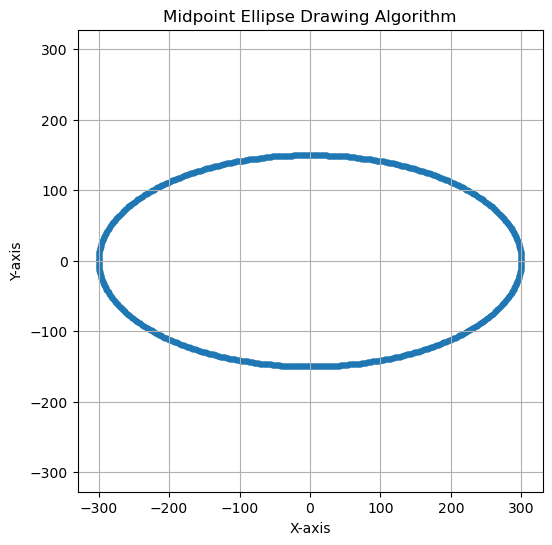

In [ ]:
# Example
plot_midpoint_ellipse(300, 150, 0, 0)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Plot symmetric points
def ellipse_points(xc, yc, x, y):
    return [
        (xc + x, yc + y),
        (xc - x, yc + y),
        (xc + x, yc - y),
        (xc - x, yc - y)
    ]

# Generate ellipse points step-by-step
def midpoint_ellipse_steps(rx, ry, xc=0, yc=0):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry

    points = []

    # Region 1
    p1 = ry2 - rx2 * ry + 0.25 * rx2
    points.extend(ellipse_points(xc, yc, x, y))

    while 2 * ry2 * x <= 2 * rx2 * y:
        x += 1
        if p1 < 0:
            p1 += 2 * ry2 * x + ry2
        else:
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2
        points.extend(ellipse_points(xc, yc, x, y))

    # Region 2
    p2 = (ry2 * (x + 0.5) ** 2) + (rx2 * (y - 1) ** 2) - rx2 * ry2

    while y > 0:
        y -= 1
        if p2 > 0:
            p2 += rx2 - 2 * rx2 * y
        else:
            x += 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2
        points.extend(ellipse_points(xc, yc, x, y))

    return points

# Animation function
def animate_midpoint_ellipse(rx, ry, xc=0, yc=0):
    points = midpoint_ellipse_steps(rx, ry, xc, yc)

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-rx - 5, rx + 5)
    ax.set_ylim(-ry - 5, ry + 5)
    ax.set_title("Animated Midpoint Ellipse Algorithm")
    ax.grid(True)

    xdata, ydata = [], []
    scat = ax.scatter([], [])

    def update(frame):
        xdata.append(points[frame][0])
        ydata.append(points[frame][1])
        scat.set_offsets(list(zip(xdata, ydata)))
        return scat,

    ani = FuncAnimation(fig, update, frames=len(points),
                        interval=50, repeat=False)

    plt.show()




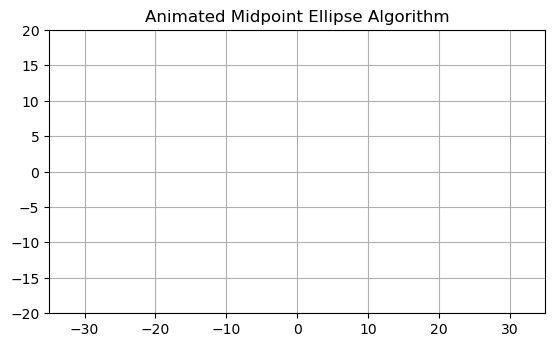

c:\Users\Asus Vivobook\anaconda3\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [ ]:
 #Run animation
animate_midpoint_ellipse(30, 15, 0, 0)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate symmetric points of ellipse (without duplicates)
def ellipse_points(xc, yc, x, y):
    return list(set([
        (xc + x, yc + y),
        (xc - x, yc + y),
        (xc + x, yc - y),
        (xc - x, yc - y)
    ]))

# Midpoint Ellipse Algorithm (step-by-step)
def midpoint_ellipse_steps(rx, ry, xc=0, yc=0):
    x = 0
    y = ry

    rx2 = rx * rx
    ry2 = ry * ry

    points = []

    # Region 1
    p1 = ry2 - rx2 * ry + 0.25 * rx2
    points.extend(ellipse_points(xc, yc, x, y))

    while 2 * ry2 * x <= 2 * rx2 * y:
        x += 1
        if p1 < 0:
            p1 += 2 * ry2 * x + ry2
        else:
            y -= 1
            p1 += 2 * ry2 * x - 2 * rx2 * y + ry2
        points.extend(ellipse_points(xc, yc, x, y))

    # Region 2
    p2 = (ry2 * (x + 0.5) ** 2) + (rx2 * (y - 1) ** 2) - (rx2 * ry2)

    while y > 0:
        y -= 1
        if p2 > 0:
            p2 += rx2 - 2 * rx2 * y
        else:
            x += 1
            p2 += 2 * ry2 * x - 2 * rx2 * y + rx2
        points.extend(ellipse_points(xc, yc, x, y))

    return points

# Animation function
def animate_midpoint_ellipse(rx, ry, xc=0, yc=0):
    points = midpoint_ellipse_steps(rx, ry, xc, yc)

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(xc - rx - 5, xc + rx + 5)
    ax.set_ylim(yc - ry - 5, yc + ry + 5)
    ax.set_title("Animated Midpoint Ellipse Algorithm")
    ax.grid(True)

    scat = ax.scatter([], [], s=10)

    def update(frame):
        scat.set_offsets(points[:frame + 1])
        return scat,

    ani = FuncAnimation(
        fig,
        update,
        frames=len(points),
        interval=40,
        repeat=False
    )

    plt.show()




In [ ]:
# Run animation animate_midpoint_ellipse(rx=20, ry=10, xc=0, yc=0)